# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
Birth = pd.DataFrame({'olds' : app_train['DAYS_BIRTH'] / 365})

Birth.head()

,olds
0,25.920548
1,45.931507
2,52.180822
3,52.068493
4,54.608219


In [6]:
bin_cut = [0, 20, 30, 40, 55, 65, 70, 80, 100]
Birth['age_grp'] = pd.cut(Birth['olds'], bins = bin_cut)
Birth.head()

,olds,age_grp
0,25.920548,"(20, 30]"
1,45.931507,"(40, 55]"
2,52.180822,"(40, 55]"
3,52.068493,"(40, 55]"
4,54.608219,"(40, 55]"


In [7]:
Birth['age_grp'].value_counts()

(40, 55]     111483
(30, 40]      82308
(55, 65]      60596
(20, 30]      45021
(65, 70]       8103
(80, 100]         0
(70, 80]          0
(0, 20]           0
Name: age_grp, dtype: int64

In [8]:
# 發現70歲以上都沒有人數，所以重新定義組間的特性
bin_cut = [0, 20, 30, 40, 55, 65, np.inf]
Birth['age_grp'] = pd.cut(Birth['olds'], bins = bin_cut)
Birth.head(10)

,olds,age_grp
0,25.920548,"(20.0, 30.0]"
1,45.931507,"(40.0, 55.0]"
2,52.180822,"(40.0, 55.0]"
3,52.068493,"(40.0, 55.0]"
4,54.608219,"(40.0, 55.0]"
5,46.413699,"(40.0, 55.0]"
6,37.747945,"(30.0, 40.0]"
7,51.643836,"(40.0, 55.0]"
8,55.065753,"(55.0, 65.0]"
9,39.641096,"(30.0, 40.0]"


In [9]:
Birth['age_grp'].value_counts()

(40.0, 55.0]    111483
(30.0, 40.0]     82308
(55.0, 65.0]     60596
(20.0, 30.0]     45021
(65.0, inf]       8103
(0.0, 20.0]          0
Name: age_grp, dtype: int64

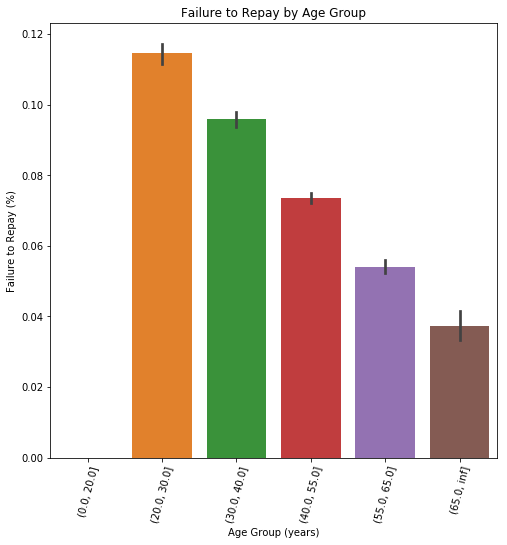

In [10]:
import seaborn as sns
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = Birth['age_grp']
py = app_train['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
#xticks(ratation) x軸的偏移量
plt.title('Failure to Repay by Age Group');

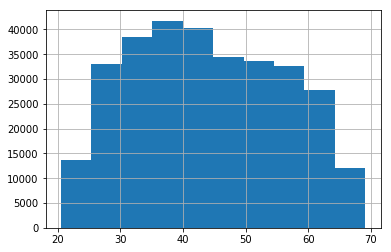

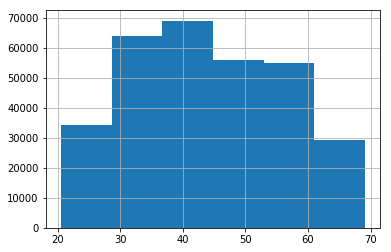

In [11]:
Birth['olds'].hist()
plt.show()
Birth['olds'].hist(bins = 6)
#根據上方資料，分為六類
plt.show() 

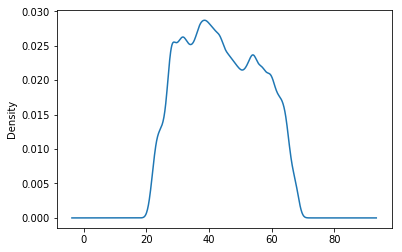

In [12]:
Birth['olds'].plot(kind = 'kde')
plt.show()